In [2]:
from ultralytics import YOLO

model = YOLO('models/humandetect.pt')



C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import cv2
cap = cv2.VideoCapture(r"D:\PROJECTS\AWIROS-CV_SUPERSTORE\sample_video\supermarket.mp4")
image = cv2.imread('supermarket_Moment2.jpg')
_,frame = cap.read()
results = model.track(frame,conf=0.4,iou=0.5)
for result in results:
    boxes = result.boxes
print(boxes)


0: 384x640 6 persons, 1108.9ms
Speed: 17.0ms preprocess, 1108.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[7.3758e+02, 4.0687e+02, 8.7322e+02, 7.1927e+02, 1.0000e+00, 9.5430e-01, 0.0000e+00],
        [3.2845e+02, 2.9375e+02, 4.0067e+02, 4.3030e+02, 2.0000e+00, 9.2681e-01, 0.0000e+00],
        [2.0158e+02, 3.8254e+02, 3.5772e+02, 6.0460e+02, 3.0000e+00, 9.1166e-01, 0.0000e+00],
        [4.4681e+02, 1.7481e+02, 5.1897e+02, 2.7507e+02, 4.0000e+00, 9.0665e-01, 0.0000e+00],
        [6.5457e+02, 1.1044e+02, 7.1380e+02, 2.6963e+02, 5.0000e+00, 8.9550e-01, 0.0000e+00],
        [6.2163e+02, 5.1240e+02, 7.5901e+02, 7.1970e+02, 6.0000e+00, 8.7119e-01, 0.0000e+00]])
cls: tensor([0., 0., 0., 0., 0., 0.])
conf: tensor([0.9543, 0.9268, 0.9117, 0.9067, 0.8955, 0.8712])
data: tensor([[7.3758e+02, 4.0687e+02, 8.7322e+02, 7.1927e+02, 1.0000e+00, 9.5430e-01, 0.0000e+00],
        [3.2845e+02, 2.9375e+02, 4.0067e+02, 4.3030e+02, 2.0000e+00, 9.2681e-01, 0.0000e+00],
        [2.0158e+02, 3.8254e+02, 3.5772e+02, 6.0460e+02, 3.0000e+00, 9.1166

In [17]:
import cv2

# Load the image
image = cv2.imread('store_sample.png')  # Replace 'your_image.jpg' with the path to your image file

# Get the height and width of the image
height, width, channels = image.shape

# Print the height and width
print("Height:", height)
print("Width:", width)


Height: 720
Width: 1278


In [28]:
# Define the area as a list of points [x1, y1, x2, y2, ..., x5, y5]
# area = [4, 271, 244, 155, 541, 212, 318, 716, 0, 719]
area = [541, 212,858,201,1228,717,318, 716]
# Define the bounding box coordinates in the format [x, y, width, height]
person_bbox =  [768.3163, 551.7424, 110.4539, 336.5151]

# Calculate the coordinates of the four corners of the bounding box
x1, y1 = person_bbox[0], person_bbox[1]
x2, y2 = x1 + person_bbox[2], y1
x3, y3 = x1, y1 + person_bbox[3]
x4, y4 = x2, y3

# Check if all four corners are inside the area
if all(
    [x1 >= min(area[0::2]) and x1 <= max(area[0::2]),
     y1 >= min(area[1::2]) and y1 <= max(area[1::2]),
     x2 >= min(area[0::2]) and x2 <= max(area[0::2]),
     y2 >= min(area[1::2]) and y2 <= max(area[1::2]),
     x3 >= min(area[0::2]) and x3 <= max(area[0::2]),
     y3 >= min(area[1::2]) and y3 <= max(area[1::2]),
     x4 >= min(area[0::2]) and x4 <= max(area[0::2]),
     y4 >= min(area[1::2]) and y4 <= max(area[1::2])]
):
    print("The person is inside the area.")
else:
    print("The person is not inside the area.")


The person is not inside the area.


In [29]:
# Define the area as a list of points [x1, y1, x2, y2, ..., x4, y4]
area = [541, 212, 858, 201, 1228, 717, 318, 716]

# Define the person's bounding box as [x, y, width, height]
person_bbox = [686.4162, 614.7559, 137.4637, 208.8882]

# Define the height and width of the image
image_height = 720
image_width = 1278

# Extract the x, y, width, and height of the person's bounding box
x, y, width, height = person_bbox

# Calculate the coordinates of the four corners of the person's bounding box
x1 = x
y1 = y
x2 = x + width
y2 = y
x3 = x + width
y3 = y + height
x4 = x
y4 = y + height

# Check if all four corners of the bounding box are inside the area
if (area[0] <= x1 <= area[2] and area[1] <= y1 <= area[3] and
    area[0] <= x2 <= area[2] and area[1] <= y2 <= area[3] and
    area[0] <= x3 <= area[2] and area[1] <= y3 <= area[3] and
    area[0] <= x4 <= area[2] and area[1] <= y4 <= area[3]):

    print("The person is inside the defined area.")
else:
    print("The person is outside the defined area.")


The person is outside the defined area.


In [31]:
import numpy as np

def is_inside_area(person_bbox, area_coords):
  """
  Checks whether the person bounding box is inside the given area coordinates.

  Args:
    person_bbox: A list of four floats representing the person bounding box in the format [x, y, width, height].
    area_coords: A list of eight floats representing the area coordinates in the format [x1, y1, x2, y2, ..., x4, y4].

  Returns:
    True if the person bounding box is inside the given area coordinates, False otherwise.
  """

  # Check if the person bounding box is within the area bounding box.
  person_bbox_xmin, person_bbox_ymin, person_bbox_xmax, person_bbox_ymax = person_bbox
  area_bbox_xmin, area_bbox_ymin, area_bbox_xmax, area_bbox_ymax = min(area_coords), min(area_coords[1::2]), max(area_coords), max(area_coords[1::2])
  if person_bbox_xmin < area_bbox_xmin or person_bbox_ymin < area_bbox_ymin or person_bbox_xmax > area_bbox_xmax or person_bbox_ymax > area_bbox_ymax:
    return False

  # Check if the person bounding box is inside the area polygon.
  # This can be done by using the Ray Casting algorithm.

  def ray_casting(point, polygon):
    """
    Checks whether the given point is inside the given polygon using the Ray Casting algorithm.

    Args:
      point: A list of two floats representing the point.
      polygon: A list of eight floats representing the polygon coordinates in the format [x1, y1, x2, y2, ..., x4, y4].

    Returns:
      True if the point is inside the polygon, False otherwise.
    """

    intersections = 0
    for i in range(len(polygon) // 2):
      edge_start = polygon[2 * i : 2 * (i + 1)]
      edge_end = polygon[2 * (i + 1) : 2 * (i + 2)]
      if edge_start[1] <= point[1] <= edge_end[1] or edge_end[1] <= point[1] <= edge_start[1]:
        if edge_start[0] + (point[1] - edge_start[1]) * (edge_end[0] - edge_start[0]) / (edge_end[1] - edge_start[1]) <= point[0]:
          intersections += 1
    return intersections % 2 == 1

  # Check if the center of the person bounding box is inside the area polygon.
  person_bbox_center_x = (person_bbox_xmin + person_bbox_xmax) / 2
  person_bbox_center_y = (person_bbox_ymin + person_bbox_ymax) / 2
  if ray_casting([person_bbox_center_x, person_bbox_center_y], area_coords):
    return True

  return False

# Example usage:

person_bbox = [686.4162, 614.7559, 137.4637, 208.8882]
area_coords = [541, 212,858,201,1228,717,318, 716]

# Remove the y coordinates from the area coordinates.
area_coords = area_coords[::2]

if is_inside_area(person_bbox, area_coords):
  print("The person is inside the given area.")
else:
  print("The person is outside the given area.")


IndexError: list index out of range

In [10]:


# Example usage
x1, y1, x2, y2 = 318, 716, 541, 212



{318: 715, 319: 713, 320: 711, 321: 709, 322: 706, 323: 704, 324: 702, 325: 700, 326: 697, 327: 695, 328: 693, 329: 691, 330: 688, 331: 686, 332: 684, 333: 681, 334: 679, 335: 677, 336: 675, 337: 672, 338: 670, 339: 668, 340: 666, 341: 663, 342: 661, 343: 659, 344: 657, 345: 654, 346: 652, 347: 650, 348: 648, 349: 645, 350: 643, 351: 641, 352: 639, 353: 636, 354: 634, 355: 632, 356: 629, 357: 627, 358: 625, 359: 623, 360: 620, 361: 618, 362: 616, 363: 614, 364: 611, 365: 609, 366: 607, 367: 605, 368: 602, 369: 600, 370: 598, 371: 596, 372: 593, 373: 591, 374: 589, 375: 587, 376: 584, 377: 582, 378: 580, 379: 578, 380: 575, 381: 573, 382: 571, 383: 568, 384: 566, 385: 564, 386: 562, 387: 559, 388: 557, 389: 555, 390: 553, 391: 550, 392: 548, 393: 546, 394: 544, 395: 541, 396: 539, 397: 537, 398: 535, 399: 532, 400: 530, 401: 528, 402: 526, 403: 523, 404: 521, 405: 519, 406: 516, 407: 514, 408: 512, 409: 510, 410: 507, 411: 505, 412: 503, 413: 501, 414: 498, 415: 496, 416: 494, 417: 492,

In [19]:
name = False

if 50 < name:
    print('hello')

In [7]:
a = 617.6843 
b = 755.1481 
c = a+((b-a)/2)
c

686.4162

In [21]:
if 1:
    print("hello")


hello


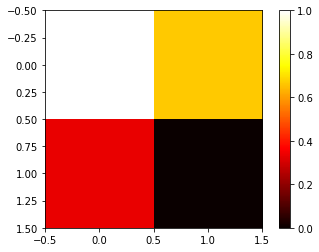

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have counts for each section
section_counts = [100, 75, 50, 25]

# Normalize the counts
normalized_counts = [(count - min(section_counts)) / (max(section_counts) - min(section_counts)) for count in section_counts]

# Create a 2D grid to represent sections
heatmap = np.zeros((2, 2))

# Fill the heatmap with normalized counts
for i, count in enumerate(normalized_counts):
    row = i // 2
    col = i % 2
    heatmap[row, col] = count

# Create a heatmap plot
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [11]:
import numpy as np
arr = [318, 716,  1228, 717,858, 201,541, 212]
new_arr  = np.array(arr).reshape(-1,2)
new_arr

array([[ 318,  716],
       [1228,  717],
       [ 858,  201],
       [ 541,  212]])

In [13]:
from datetime import datetime  # Import datetime module
import time

start_time = datetime.now()
time.sleep(5)
end_time = datetime.now()  # Call datetime.now() to get the current time
r = end_time - start_time
r

datetime.timedelta(seconds=5, microseconds=9321)

In [16]:
person_id = 5
start_times = {} 
if person_id not in start_times:
 start_times[person_id] = True
start_times

{5: True}

In [17]:
person_id = 5
if person_id not in start_times:
   start_times[person_id] = 1
else:
   start_times[person_id]=start_times[person_id]+1

false


In [4]:
empty = set()
k = 1.0
if k  not in empty:
    empty.add(5)

empty

{5}

: 